In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import shuffle

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 78.9MB/s]


In [3]:
df = pd.read_csv('/content/data_banknote_authentication.txt')
df

,x1,x2,x3,x4,y
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
shuffled_data = shuffle(df)
shuffled_data.to_csv('created_data.csv', index=False)
print(shuffled_data)

          x1       x2        x3       x4  y
638   2.7213   7.0500  -0.58808  0.41809  0
67    2.4235   9.5332  -3.07890 -2.77460  0
531   3.3583  10.3567  -3.73010 -3.69910  0
1171 -3.8552   3.5219  -0.38415 -3.86080  1
386  -2.4953  11.1472   1.93530 -3.46380  0
...      ...      ...       ...      ... ..
289   3.2422   6.2265   0.12224 -1.44660  0
701   5.5910  10.4643  -4.38390 -4.33790  0
1192 -4.4018 -12.9371  15.65590 -1.68060  1
640   4.1665  -0.4449   0.23448  0.27843  0
429   2.5503  -4.9518   6.37290 -0.41596  0

[1372 rows x 5 columns]


In [5]:
df2 = pd.read_csv('/content/created_data.csv')
df2

,x1,x2,x3,x4,y
0,2.7213,7.0500,-0.58808,0.41809,0
1,2.4235,9.5332,-3.07890,-2.77460,0
2,3.3583,10.3567,-3.73010,-3.69910,0
3,-3.8552,3.5219,-0.38415,-3.86080,1
4,-2.4953,11.1472,1.93530,-3.46380,0
...,...,...,...,...,...
1367,3.2422,6.2265,0.12224,-1.44660,0
1368,5.5910,10.4643,-4.38390,-4.33790,0
1369,-4.4018,-12.9371,15.65590,-1.68060,1
1370,4.1665,-0.4449,0.23448,0.27843,0


In [6]:
class_counts = df2['y'].value_counts()

# نمایش تعداد نمونه‌ها برای هر کلاس
print(class_counts)

0    762
1    610
Name: y, dtype: int64


In [7]:
class_0_samples = df2[df2['y'] == 0].sample(610)
class_1_samples = df2[df2['y'] == 1].sample(610)

# ایجاد دیتافریم جدید با 1220 نمونه انتخابی
df1 = pd.concat([class_0_samples, class_1_samples], ignore_index=True)

Logistic Regression (from Scratch)

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

Binary Cross Entropy (BCE)

In [10]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

Gradient

In [11]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

Gradient Descent

In [12]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

Accuracy

In [13]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

Train

In [14]:
X = df1[['x1','x2','x3','x4']].values
y = df1[['y']].values
X, y

(array([[ 4.9249 ,  0.68906,  0.77344,  1.2095 ],
        [ 4.0948 , -2.9674 ,  2.3689 ,  0.75429],
        [ 2.0153 ,  0.43661,  4.5864 , -0.3151 ],
        ...,
        [-4.9462 ,  3.5716 ,  0.82742, -1.4957 ],
        [-2.588  ,  3.8654 , -0.3336 , -1.2797 ],
        [-3.5741 ,  3.944  , -0.07912, -2.1203 ]]),
 array([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]]))

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((976, 4), (244, 4), (976, 1), (244, 1))

In [16]:
y_hat = logistic_regression(x_train, np.random.randn(4, 1))
print(y_hat.shape)

(976, 1)


In [17]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

(976, 5)

In [18]:
m = 4
w = np.random.randn(m+1, 1)
print(w.shape)

(5, 1)


In [19]:
eta = 0.01
n_epochs = 60000 #N

In [20]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_train, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_train, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) %  1== 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Streaming output truncated to the last 5000 lines.
Epoch=55000, 	 E=0.01974,	 w=[ 3.92805178 -3.3839161  -1.98509926 -2.4045402  -0.15425716]
Epoch=55001, 	 E=0.01974,	 w=[ 3.92806771 -3.38393326 -1.98510833 -2.40455204 -0.15425788]
Epoch=55002, 	 E=0.01974,	 w=[ 3.92808363 -3.38395041 -1.9851174  -2.40456388 -0.15425859]
Epoch=55003, 	 E=0.01974,	 w=[ 3.92809956 -3.38396756 -1.98512647 -2.40457572 -0.15425931]
Epoch=55004, 	 E=0.01974,	 w=[ 3.92811548 -3.38398471 -1.98513554 -2.40458756 -0.15426002]
Epoch=55005, 	 E=0.01974,	 w=[ 3.92813141 -3.38400187 -1.98514461 -2.4045994  -0.15426074]
Epoch=55006, 	 E=0.01974,	 w=[ 3.92814733 -3.38401902 -1.98515368 -2.40461124 -0.15426146]
Epoch=55007, 	 E=0.01974,	 w=[ 3.92816326 -3.38403617 -1.98516275 -2.40462307 -0.15426217]
Epoch=55008, 	 E=0.01974,	 w=[ 3.92817918 -3.38405332 -1.98517182 -2.40463491 -0.15426289]
Epoch=55009, 	 E=0.01974,	 w=[ 3.9281951  -3.38407047 -1.98518089 -2.40464675 -0.1542636 ]
Epoch=55010, 	 E=0.01974,	 w=[ 3.928211

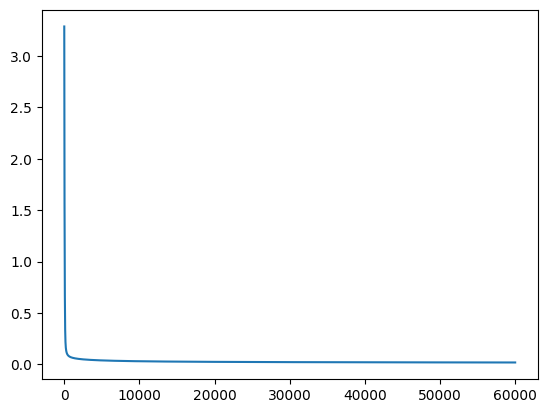

In [21]:
plt.plot(error_hist)

In [22]:
y_hat = logistic_regression(x_train, w)
accuracy(y_train, y_hat)

0.9938524590163934

In [23]:
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

0.9877049180327869